Selected Species: Acrocephalus arundinaceus (1), Common Name: Great Reed Warbler
Number of species items: 673
Total number of species extracted: 673
Sample species data:
Image Link: /afbid/search/browse/species/1503/28, Species Name: Acrocephalus arundinaceus (1), Common Name: Great Reed Warbler
Image Link: /afbid/search/browse/species/1507/28, Species Name: Acrocephalus gracilirostris (5), Common Name: Lesser Swamp Warbler
Image Link: /afbid/search/browse/species/1504/28, Species Name: Acrocephalus griseldis (1), Common Name: Basra Reed Warbler
Image Link: /afbid/search/browse/species/1506/28, Species Name: Acrocephalus rufescens (1), Common Name: Greater Swamp Warbler
Image Link: /afbid/search/browse/species/1499/28, Species Name: Acrocephalus schoenobaenus (1), Common Name: Sedge Warbler
Extracted 673 species and saved to CSV.
Image downloaded successfully.
['bird1.jpg']


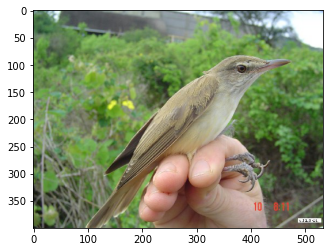

In [1]:
%run web-scraping-guide-beautifulsoup.ipynb

In [2]:
import shutil
import os


# Function to download images in batches
def download_images(df_species, start_idx, end_idx):

    # Loop over the specified range of species
    for i in range(start_idx, end_idx):
        species_info = df_species.iloc[i]
        species_page_url = f"{base_url}{species_info['Image_Link']}"
        common_name = species_info['Common_Name']

        # Request species page
        response_species = requests.get(species_page_url, headers=headers)
        if response_species.status_code != 200:
            print(f"Failed to retrieve species page for {common_name}, status code: {response_species.status_code}")
            continue
        
        soup_species = BeautifulSoup(response_species.content, 'html.parser')

        # Find and download images
        image_list = soup_species.find('ul', class_='row image-list')
        if image_list:
            images = image_list.findAll('img')
            for idx, img in enumerate(images):
                img_src = img.attrs['src']
                img_url = f"{base_url}{img_src}"
                
                # Create folder for the species
                species_folder = f"BirdImages/{common_name}"
                if not os.path.exists(species_folder):
                    os.makedirs(species_folder)

                # Download and save image
                img_response = requests.get(img_url, headers=headers, stream=True)
                if img_response.headers['Content-Type'].startswith('image/'):
                    img_filename = f"{species_folder}/{common_name}_img{idx+1}.jpg"
                    with open(img_filename, 'wb') as f:
                        shutil.copyfileobj(img_response.raw, f)
                    print(f"Downloaded: {img_filename}")
                else:
                    print(f"Unexpected content type for {common_name}: {img_response.headers['Content-Type']}")

        # Sleep to avoid overwhelming the server
        time.sleep(5)

Below is an example of how the code works to download images. I had already downloaded all the images to my device so for illustration purposes only the images of the first five Kenyan bird species will be downloaded.

In [3]:
# Example of downloading images from species 1 to 5
if df_species is not None:
    download_images(df_species, 0, 5)

Downloaded: BirdImages/Great Reed Warbler/Great Reed Warbler_img1.jpg
Downloaded: BirdImages/Lesser Swamp Warbler/Lesser Swamp Warbler_img1.jpg
Downloaded: BirdImages/Lesser Swamp Warbler/Lesser Swamp Warbler_img2.jpg
Downloaded: BirdImages/Lesser Swamp Warbler/Lesser Swamp Warbler_img3.jpg
Downloaded: BirdImages/Lesser Swamp Warbler/Lesser Swamp Warbler_img4.jpg
Downloaded: BirdImages/Lesser Swamp Warbler/Lesser Swamp Warbler_img5.jpg
Downloaded: BirdImages/Basra Reed Warbler/Basra Reed Warbler_img1.jpg
Downloaded: BirdImages/Greater Swamp Warbler/Greater Swamp Warbler_img1.jpg
Downloaded: BirdImages/Sedge Warbler/Sedge Warbler_img1.jpg
